In [49]:
import numpy as np
import random as rd
import numpy as np
class Labyrinth:
    def __init__(self,shape):
        self.shape=shape
        self.grid=np.zeros(self.shape)
        # We're using binary tree algorithm

    def _carveNorth(self,i,j):
        self.grid[i+1,j]=1
    def _carveEast(self,i,j):
        self.grid[i,j+1]=1

    def generate(self):
        for i in range (0,self.shape[0]-1,1):
            for j in range(0,self.shape[1]-1,1):
                if i==0 :
                    self._carveEast(i,j)
                if j==self.shape[1]-1:
                    self._carveNorth(i,j)
                else:
                    decision=np.random.randint(0,2)
                    if decision==0:
                        self._carveNorth(i,j)
                    else:
                        self._carveEast(i,j)
        source=(0,0)
        aim=(self.shape[0]-1,self.shape[1]-1)
        self.grid[aim[0],aim[1]]=3
        self.grid[source[0],source[1]]=2
        return self.grid,source,aim

    def _moveLeft(self,a:int ,b:int ) ->bool:
        if a-1<self.shape[0] and b<self.shape[1] and a>=0 and b>=0:
            return True
        return False
    def _moveRight(self,a:int ,b:int ) ->bool:
        if a+1<self.shape[0] and b<self.shape[1] and a>=0 and b>=0:
            return True
        return False
    def _moveUp(self,a:int ,b:int ) ->bool:
        if a<self.shape[0] and b+1<self.shape[1] and a>=0 and b>=0:
            return True
        return False
    def _moveDown(self,a:int ,b:int ) ->bool:
        if a<self.shape[0] and b-1<self.shape[1] and a>=0 and b>=0:
            return True
        False
    def neighbours(self,lab,a:int,b:int)->list[list]:
        neighbours_list=[]
        if self._moveRight(a,b) and (lab[a+1,b]==1 or lab[a+1,b]==3 or lab[a+1,b]==2):
            neighbours_list.append((a+1,b))
        if self._moveLeft(a,b) and (lab[a-1,b]==1 or lab[a-1,b]==3 or lab[a-1,b]==2):
            neighbours_list.append((a-1,b))
        if self._moveUp(a,b) and (lab[a,b+1]==1 or lab[a,b+1]==3 or lab[a,b+1]==2):
            neighbours_list.append((a,b+1))
        if self._moveDown(a,b) and (lab[a,b-1]==1 or lab[a,b-1]==3 or lab[a,b-1]==2):

            neighbours_list.append((a,b-1))
        return neighbours_list
    
class File:
    def __init__(self):
        self.file=[]
    def first(self):
        return self.file[0]
    def isEmpty(self):
        if len(self.file)==0:
            return True
        return False
    def enfile(self,point:tuple):
        self.file.append(point)
    def defile(self):
        self.file.pop(0)

class bfs_solver:
    def __init__ (self,lab:np.ndarray,source,aim):
        self.lab=lab
        self.source=source
        self.aim=aim
   
    def treat(self):
        file = File() # To visit nodes
        laby=Labyrinth(self.lab.shape)
        file.enfile(tuple(self.source))
        dist={tuple(self.source): 0 }
        parent={tuple(self.source): None}
        color={"white":[],
               "grey":[],
               "black":[]}
        for i in range( self.lab.shape[0]) :
            for j in range (self.lab.shape[1]):
                if (self.lab[i,j]==1 or self.lab[i,j]==2 or self.lab[i,j]==3):
                    color["white"].append((i,j)) 
        while not file.isEmpty():
            vertice=file.first()
            for neighbour in laby.neighbours(self.lab,vertice[0],vertice[1]):
                if  neighbour in color["white"]:
                    color["grey"].append(neighbour)
                    color["white"].remove(neighbour)
                    dist[tuple(neighbour)]=dist[tuple(vertice)]+1
                    parent[tuple(neighbour)]=vertice
                    file.enfile(tuple(neighbour))
            file.defile()
            color["black"].append(tuple(vertice))
            if tuple(vertice) in color["grey"]:
                color["grey"].remove(tuple(vertice))
        return dist,parent,color
    
    def backtracking(self,parent,source,aim):
        path=[]
        current=aim
        if tuple(aim) not in parent:
            return None  # Aim is unreachable
        while current != source:
            path.append(current)
            current=parent[current]
        path.append(source)
        path.reverse()
        return path
    
    def solve(self):
        dist,parent,color=self.treat()
        path=self.backtracking(parent,tuple(self.source),tuple(self.aim))
        return path
    
class bellman_ford_solver:
        def __init__ (self,lab:np.ndarray,source,aim):
            self.lab=lab
            self.source=source
            self.aim=aim
        def treat(self):
            dist={}
            parent={}
            for i in range(self.lab.shape[0]):
                for j in range(self.lab.shape[1]):
                    if self.lab[i,j]==2 or self.lab[i,j]==3 or self.lab[i,j]==1:
                        dist[(i,j)]=float('inf')
                        parent[(i,j)]=None
            dist[tuple(self.source)]=0
            laby=Labyrinth(self.lab.shape)
            for _ in range(len(dist)-1):
                for u in dist.keys():
                    for v in laby.neighbours(self.lab,u[0],u[1]):
                        if v in dist:
                            if dist[u]+1<dist[v]:
                                dist[v]=dist[u]+1
                                parent[v]=u

            # Check for negative-weight cycles (not applicable here since all weights are positive but...)
            for u in dist.keys():
                    for v in laby.neighbours(self.lab,u[0],u[1]):
                        if v in dist:
                            if dist[u]+1<dist[v]:
                                raise ValueError("Graph contains a negative-weight cycle") # That is not possible here but generally good to check
            return dist,parent
        def backtracking(self,parent,source,aim):
            path=[]
            current=aim
            if tuple(aim) not in parent:
                return None  # Aim is unreachable
            while current != source:
                path.append(current)
                current=parent[current]
            path.append(source)
            path.reverse()
            return path
        def solve(self):
            dist,parent=self.treat()
            path=self.backtracking(parent,self.source,self.aim)
            return path

class a_star_solver:
    def __init__(self, lab: np.ndarray, source, aim):
        self.lab = lab
        self.source = source
        self.aim = aim
    
    def heuristic(self, pos):
        """Manhattan distance heuristic"""
        return abs(pos[0] - self.aim[0]) + abs(pos[1] - self.aim[1])
    
    def treat(self):
        laby = Labyrinth(self.lab.shape)
        open_set = [(self.heuristic(self.source), self.source)]
        came_from = {}
        g_score = {tuple(self.source): 0}
        f_score = {tuple(self.source): self.heuristic(self.source)}
        
        while open_set:
            # Get node with lowest f_score
            open_set.sort(key=lambda x: x[0])
            _, current = open_set.pop(0)
            
            if current == self.aim:
                # Reconstruct path
                path = [current]
                while tuple(current) in came_from:
                    current = came_from[tuple(current)]
                    path.append(current)
                path.reverse()
                return path
            
            for neighbour in laby.neighbours(self.lab, current[0], current[1]):
                tentative_g_score = g_score[tuple(current)] + 1
                
                if tuple(neighbour) not in g_score or tentative_g_score < g_score[tuple(neighbour)]:
                    came_from[tuple(neighbour)] = current
                    g_score[tuple(neighbour)] = tentative_g_score
                    f_score[tuple(neighbour)] = tentative_g_score + self.heuristic(neighbour)
                    
                    if neighbour not in [node for _, node in open_set]:
                        open_set.append((f_score[tuple(neighbour)], neighbour))
        
        return None  # No path found
    
    def solve(self):
        path = self.treat()
        return path
        

BFS optimal path length: 201


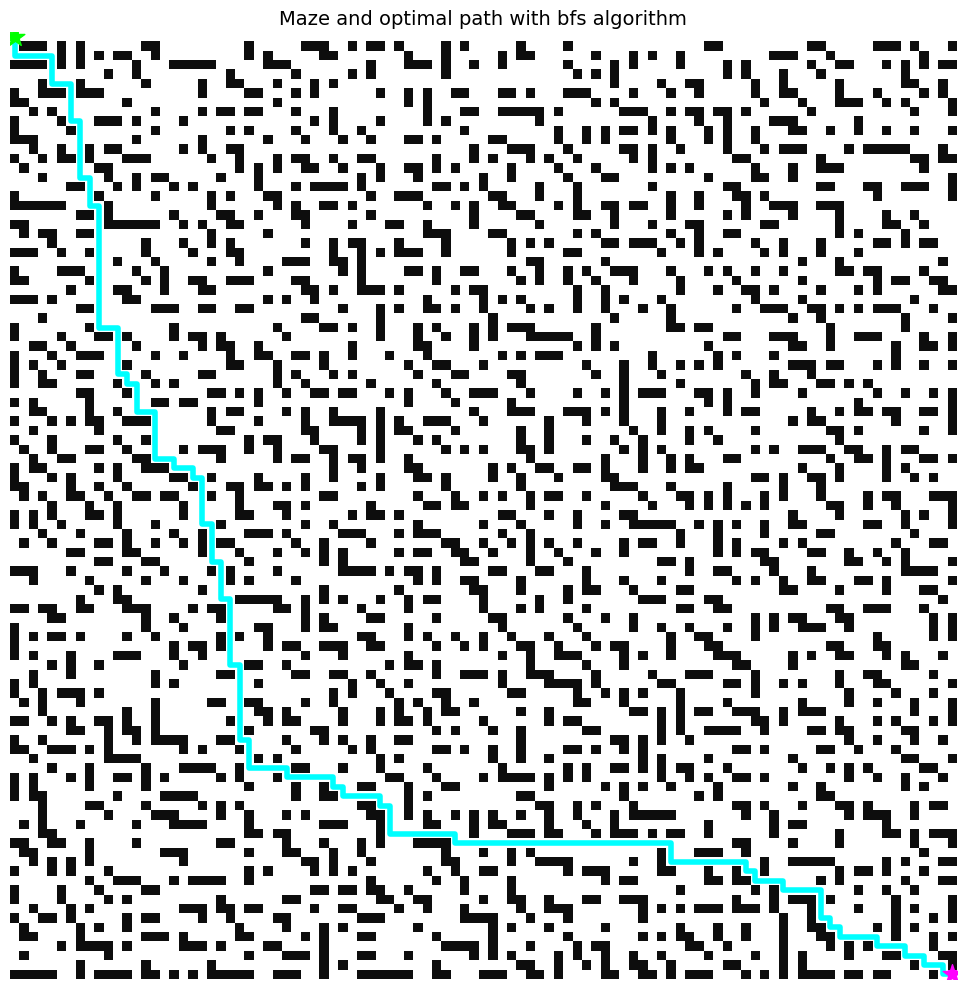

In [50]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


labyrinth=Labyrinth((101,101))
lab,source,aim=labyrinth.generate()
bfs_solver=bfs_solver(lab,source,aim)
optimal_path_bfs=bfs_solver.solve()

#Vizualisation of bfs_solver result (generated with gpt5-mini)
plt.figure(figsize=(10,10))
cmap=ListedColormap(['black', 'white', 'lime', 'magenta'])
plt.imshow(lab, cmap=cmap, interpolation='nearest', origin='upper', alpha=0.95, aspect='equal')
y, x = zip(*optimal_path_bfs)
plt.plot(x, y, color='cyan', linewidth=4, solid_capstyle='round', zorder=3)
plt.scatter([source[1]], [source[0]], color='lime', marker='*', s=200, zorder=4, label='Start')
plt.scatter([aim[1]], [aim[0]], color='magenta', marker='*', s=200, zorder=4, label='End')
plt.title("Maze and optimal path with bfs algorithm", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("labyrinthe.png", dpi=300)
print("BFS optimal path length:", len(optimal_path_bfs))
plt.show()


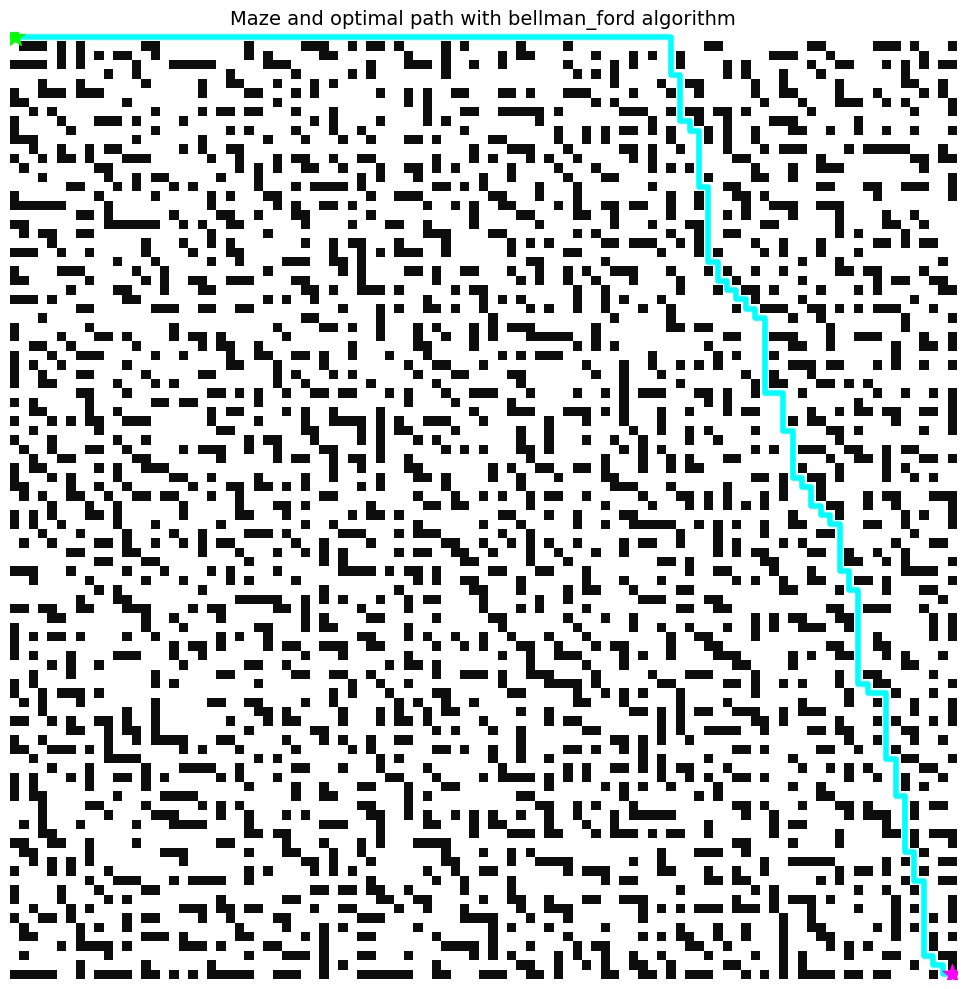

In [51]:
bellman_=bellman_ford_solver(lab,source,aim)
optimal_path=bellman_.solve()

#Vizualisation of bellman_ford_solver result (generated with gpt5-mini)
cmap=ListedColormap(['black', 'white', 'lime', 'magenta'])
plt.figure(figsize=(10,10))
plt.imshow(lab, cmap=cmap, interpolation='nearest', origin='upper', alpha=0.95, aspect='equal')
y, x = zip(*optimal_path)
plt.plot(x, y, color='cyan', linewidth=4, solid_capstyle='round', zorder=3)
plt.scatter([source[1]], [source[0]], color='lime', marker='*', s=200, zorder=4, label='Start')
plt.scatter([aim[1]], [aim[0]], color='magenta', marker='*', s=200, zorder=4, label='End')
plt.title("Maze and optimal path with bellman_ford algorithm", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("labyrinthe.png", dpi=300)
plt.show()

In [53]:
print("Bellman-Ford optimal path length:", len(optimal_path))

Bellman-Ford optimal path length: 201


In [3]:
import numpy as np

class aco_solver:
    def __init__ (self,lab:np.ndarray,source,aim):
        self.lab=lab
        self.source=source
        self.aim=aim
        self.laby = Labyrinth(lab.shape)  # pour accéder à neighbours

        # pré-calcul des distances BFS depuis l’aim
        bfs = bfs_solver(lab, aim, source)  # on inverse source/aim pour avoir dist vers aim
        dist_map, _, _ = bfs.treat()
        self.dist_map = dist_map

    def treat(self):
        num_ants = 50
        pheromone = np.ones(self.lab.shape) * 0.1
        best_path = None
        best_length = float('inf')

        alpha, beta, Q = 1.0, 2.0, 100.0

        for iteration in range(100):
            all_paths = []
            for _ in range(num_ants):
                current_position = self.source
                path = [current_position]
                while current_position != self.aim:
                    neighbours = self.laby.neighbours(self.lab, current_position[0], current_position[1])
                    if not neighbours:
                        break

                    probabilities = []
                    for neighbour in neighbours:
                        tau = pheromone[neighbour[0], neighbour[1]]
                        # heuristique basée sur BFS
                        if tuple(neighbour) in self.dist_map:
                            eta = 1.0 / (self.dist_map[tuple(neighbour)] + 1)
                        else:
                            eta = 0.0
                        probabilities.append((tau**alpha) * (eta**beta))

                    probabilities = np.array(probabilities)
                    if probabilities.sum() == 0:
                        probabilities = np.ones(len(neighbours)) / len(neighbours)
                    else:
                        probabilities /= probabilities.sum()

                    next_position = neighbours[np.random.choice(len(neighbours), p=probabilities)]
                    path.append(next_position)
                    current_position = next_position

                if current_position == self.aim:
                    all_paths.append(path)
                    path_length = len(path)
                    if path_length < best_length:
                        best_length = path_length
                        best_path = path

            pheromone *= 0.95
            for path in all_paths:
                path_length = len(path)
                for position in path:
                    pheromone[position[0], position[1]] += Q / path_length

        return best_path

    def solve(self):
        path = self.treat()
        return path

In [ ]:
# Adapted visualization for aco_solver
labyrinth = Labyrinth((100,100))
lab, source, aim = labyrinth.generate()
aco = aco_solver(lab, source, aim)
optimal_path_aco = aco.solve()

#Vizualisation of aco_solver result (generated with gpt5-mini)
plt.figure(figsize=(10,10))
cmap=ListedColormap(['black', 'white', 'lime', 'magenta'])
plt.imshow(lab, cmap=cmap, interpolation='nearest', origin='upper', alpha=0.95, aspect='equal')
y, x = zip(*optimal_path_aco)
plt.plot(x, y, color='cyan', linewidth=4, solid_capstyle='round', zorder=3)
plt.scatter([source[1]], [source[0]], color='lime', marker='*', s=200, zorder=4, label='Start')
plt.scatter([aim[1]], [aim[0]], color='magenta', marker='*', s=200, zorder=4, label='End')
plt.title("Maze and optimal path with aco algorithm", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("labyrinthe_aco.png", dpi=300)
print("ACO optimal path length:", len(optimal_path_aco))
plt.show()


A* optimal path length: 201


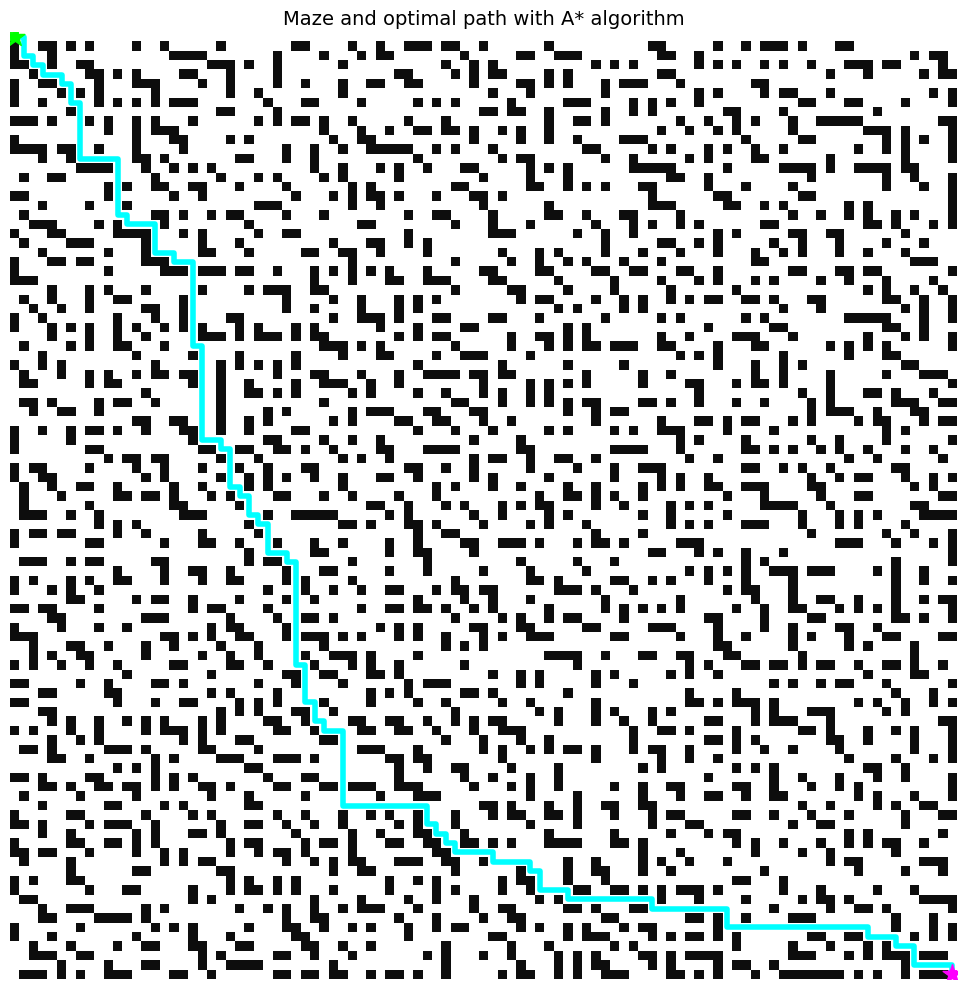

In [55]:
# Adapted visualization for a_star_solver
labyrinth = Labyrinth((101,101))
lab, source, aim = labyrinth.generate()
a_star = a_star_solver(lab, source, aim)
optimal_path_astar = a_star.solve()

#Vizualisation of a_star_solver result (generated with gpt5-mini)
plt.figure(figsize=(10,10))
cmap=ListedColormap(['black', 'white', 'lime', 'magenta'])
plt.imshow(lab, cmap=cmap, interpolation='nearest', origin='upper', alpha=0.95, aspect='equal')
y, x = zip(*optimal_path_astar)
plt.plot(x, y, color='cyan', linewidth=4, solid_capstyle='round', zorder=3)
plt.scatter([source[1]], [source[0]], color='lime', marker='*', s=200, zorder=4, label='Start')
plt.scatter([aim[1]], [aim[0]], color='magenta', marker='*', s=200, zorder=4, label='End')
plt.title("Maze and optimal path with A* algorithm", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("labyrinthe_astar.png", dpi=300)
print("A* optimal path length:", len(optimal_path_astar))
plt.show()

In [56]:
class Labyrinth3d:
    def __init__(self, shape):
        """
        Shape should ideally be (height, width, depth) with odd numbers
        to allow for a wall-and-passage structure.
        """
        # Ensure shape is odd for wall/path representation
        self.shape = tuple(s if s % 2 != 0 else s + 1 for s in shape)
        # 0 = Wall, 1 = Path
        self.grid = np.zeros(self.shape, dtype=int)

    def generate(self):
        #  Fill cells (odd coordinates)
        for z in range(1, self.shape[2], 2):
            for y in range(1, self.shape[1], 2):
                for x in range(1, self.shape[0], 2):
                    self.grid[x, y, z] = 1
                    
                    # 2. Binary Tree Logic: Carve toward North, East, OR Up
                    directions = []
                    if x + 2 < self.shape[0]: directions.append((1, 0, 0)) # East
                    if y + 2 < self.shape[1]: directions.append((0, 1, 0)) # North
                    if z + 2 < self.shape[2]: directions.append((0, 0, 1)) # Up

                    if directions:
                        dx, dy, dz = directions[np.random.randint(len(directions))]
                        # Carve the wall between current cell and the next
                        self.grid[x + dx, y + dy, z + dz] = 1

        # Define start and end points
        source = (1, 1, 1)
        aim = (self.shape[0] - 2, self.shape[1] - 2, self.shape[2] - 2)
        
        self.grid[source] = 2  # Start
        self.grid[aim] = 3     # End
        
        return self.grid, source, aim

    def neighbours(self, lab, a, b, c):
        """
        Returns a list of reachable adjacent cells.
        Checks for path connectivity by looking at the 'wall' between cells.
        """
        neighbours_list = []
        
        # Directions: Right, Left, North, South, Up, Down
        # We move 2 units to jump from one cell center to the next
        directions = [
            (2, 0, 0), (-2, 0, 0),  # X-axis
            (0, 2, 0), (0, -2, 0),  # Y-axis
            (0, 0, 2), (0, 0, -2)   # Z-axis
        ]
        
        for di, dj, dk in directions:
            ni, nj, nk = a + di, b + dj, c + dk
            
            # 1. Boundary Check: Ensure the target cell is within the grid
            if 0 <= ni < self.shape[0] and 0 <= nj < self.shape[1] and 0 <= nk < self.shape[2]:
                
                # 2. Connectivity Check: 
                # We look at the coordinate exactly between current (a,b,c) and target (ni,nj,nk).
                # If grid value >= 1, the 'wall' has been carved into a passage.
                if lab[a + di // 2, b + dj // 2, c + dk // 2] >= 1:
                    neighbours_list.append((ni, nj, nk))
                    
        return neighbours_list

In [34]:
class File:
    def __init__(self):
        self.file=[]
    def first(self):
        return self.file[0]
    def isEmpty(self):
        if len(self.file)==0:
            return True
        return False
    def enfile(self,point:tuple):
        self.file.append(point)
    def defile(self):
        self.file.pop(0)


In [30]:
class bfs_solver_3d:

    def __init__ (self,lab:np.ndarray,source,aim):
        self.lab=lab
        self.source=source
        self.aim=aim
   
    def treat(self):
        file = File() # To visit nodes
        laby=Labyrinth3d(self.lab.shape)
        file.enfile(tuple(self.source))
        dist={tuple(self.source): 0 }
        parent={tuple(self.source): None}
        color={"white":[],
               "grey":[],
               "black":[]}
        for i in range(self.lab.shape[0]):
            for j in range(self.lab.shape[1]):
                for k in range(self.lab.shape[2]):
                    if (self.lab[i,j,k]==1 or self.lab[i,j,k]==2 or self.lab[i,j,k]==3):
                        color["white"].append((i,j,k))
        
        while not file.isEmpty():
            vertice=file.first()
            for neighbour in laby.neighbours(self.lab,vertice[0],vertice[1],vertice[2]):
                if neighbour in color["white"]:
                    color["grey"].append(neighbour)
                    color["white"].remove(neighbour)
                    dist[tuple(neighbour)]=dist[tuple(vertice)]+1
                    parent[tuple(neighbour)]=vertice
                    file.enfile(tuple(neighbour))
            file.defile()
            color["black"].append(tuple(vertice))
            if tuple(vertice) in color["grey"]:
                color["grey"].remove(tuple(vertice))
        return dist,parent,color
    
    def backtracking(self,parent,source,aim):
        path=[]
        current=aim
        if tuple(aim) not in parent:
            return None  # Aim is unreachable
        while current != source:
            path.append(current)
            current=parent[current]
        path.append(source)
        path.reverse()
        return path

    def solve(self):
        dist,parent,color=self.treat()
        path=self.backtracking(parent,tuple(self.source),tuple(self.aim))
        return path

Drawing 3852 wall cubes...
Optimal path length: 23


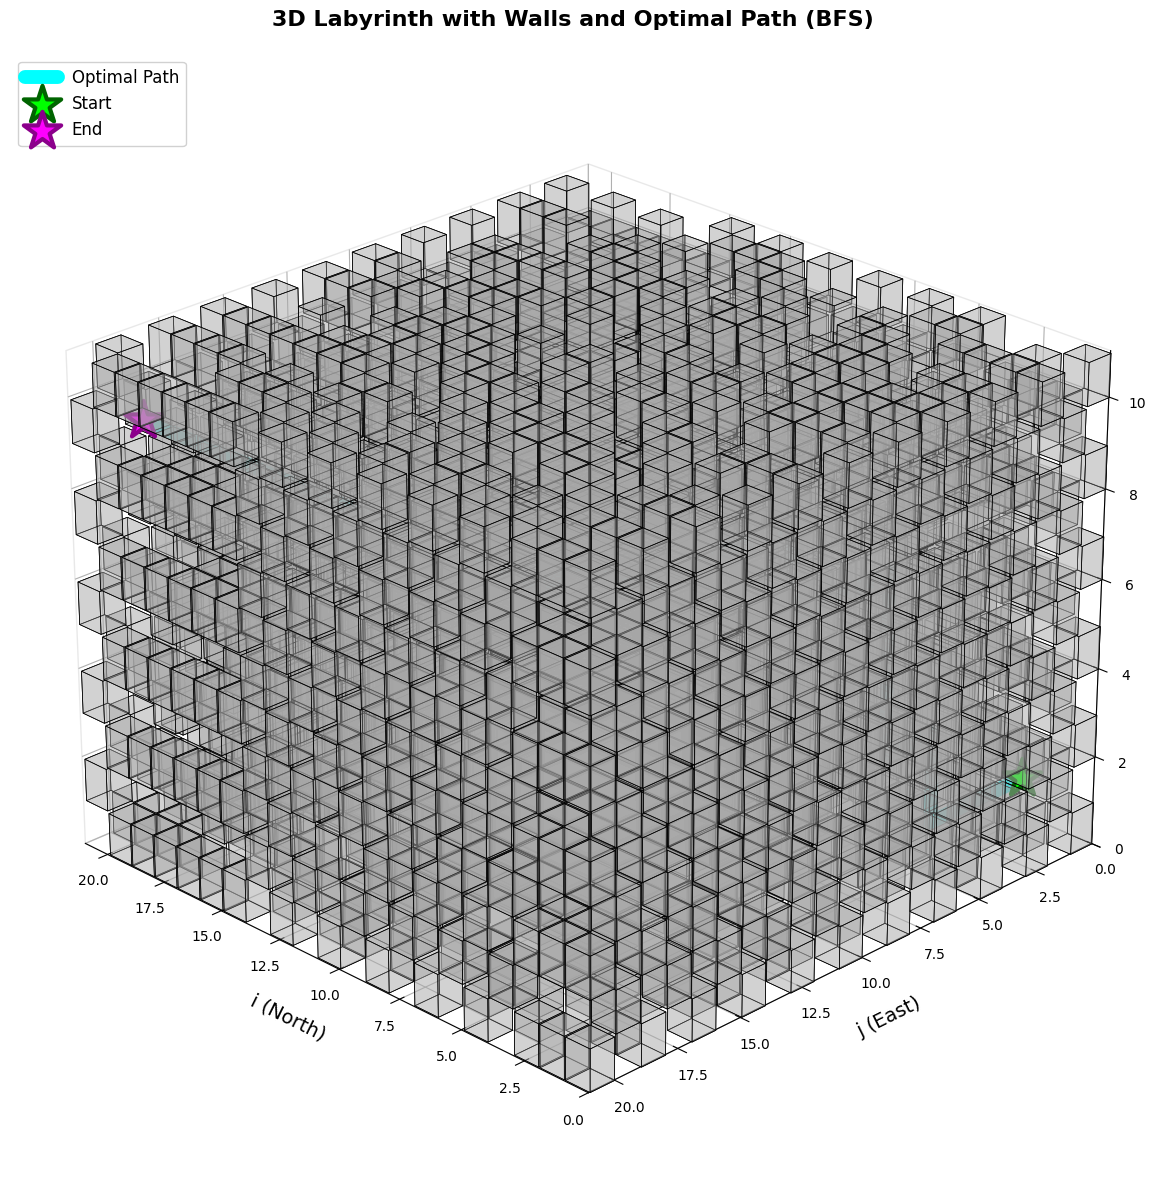

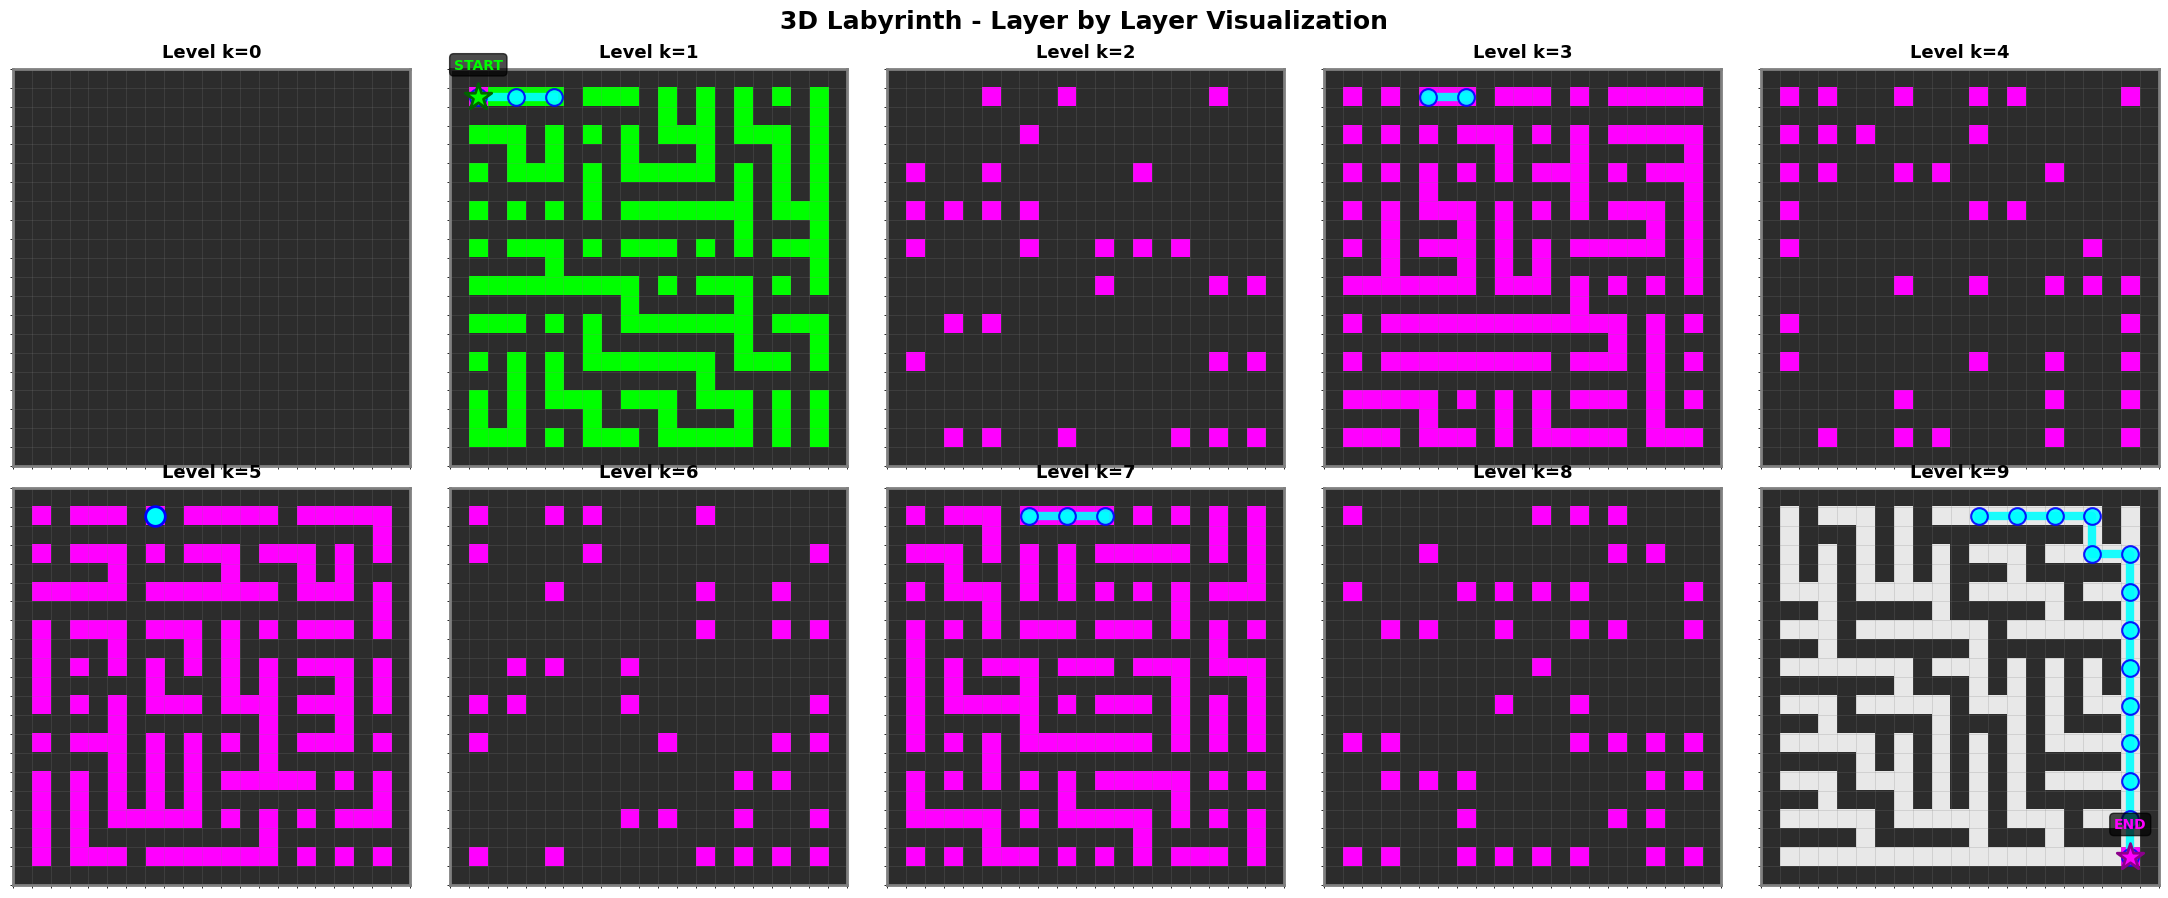

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate the 3D labyrinth
labyrinth = Labyrinth3d((20, 20, 10))
lab, source, aim = labyrinth.generate()

# Solve with BFS
solver = bfs_solver_3d(lab, source, aim)
optimal_path = solver.solve()

# Function to draw a cube
def draw_cube(ax, x, y, z, size=0.9, color='gray', alpha=0.3):
    r = [0, size]
    X, Y = np.meshgrid(r, r)
    
    # Define the 6 faces of the cube
    faces = []
    # Bottom and top
    faces.append([x+X, y+Y, z+np.zeros_like(X)])
    faces.append([x+X, y+Y, z+size+np.zeros_like(X)])
    # Front and back
    faces.append([x+X, y+np.zeros_like(X), z+Y])
    faces.append([x+X, y+size+np.zeros_like(X), z+Y])
    # Left and right
    faces.append([x+np.zeros_like(X), y+X, z+Y])
    faces.append([x+size+np.zeros_like(X), y+X, z+Y])
    
    # Draw each face
    for face_coords in faces:
        face = np.array([[face_coords[0][i,j], face_coords[1][i,j], face_coords[2][i,j]] 
                        for i in range(2) for j in range(2)])
        face = face[[0,1,3,2]]  # Reorder vertices
        poly = [[face[0], face[1], face[2], face[3]]]
        coll = Poly3DCollection(poly, facecolors=color, 
                                linewidths=0.5, edgecolors='black', 
                                alpha=alpha)
        coll.set_zorder(10)
        ax.add_collection3d(coll)

# Create 3D visualization with walls
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Draw walls (cells with value 0)
walls = np.where(lab == 0)
i_walls, j_walls, k_walls = walls

print(f"Drawing {len(i_walls)} wall cubes...")
for i, j, k in zip(i_walls[::2], j_walls[::2], k_walls[::2]):  # Skip some for performance
    draw_cube(ax, i, j, k, size=0.95, color='darkgray', alpha=0.3)

# Plot the optimal path as a thick tube
if optimal_path:
    path_array = np.array(optimal_path)
    i_path = path_array[:, 0] + 0.5  # Center in cells
    j_path = path_array[:, 1] + 0.5
    k_path = path_array[:, 2] + 0.5
    
    ax.plot(i_path, j_path, k_path, color='cyan', linewidth=10, 
            solid_capstyle='round', zorder=100, label='Optimal Path',
            marker='o', markersize=5, markerfacecolor='cyan')
    
    # Mark start and end points with larger markers
    ax.scatter([source[0]+0.5], [source[1]+0.5], [source[2]+0.5], 
               color='lime', marker='*', s=800, zorder=200, 
               edgecolors='darkgreen', linewidths=3, label='Start')
    ax.scatter([aim[0]+0.5], [aim[1]+0.5], [aim[2]+0.5], 
               color='magenta', marker='*', s=800, zorder=200, 
               edgecolors='darkmagenta', linewidths=3, label='End')
    
    print(f"Optimal path length: {len(optimal_path)}")
else:
    print("No path found!")

# Set labels and title
ax.set_xlabel('i (North)', fontsize=14, labelpad=10)
ax.set_ylabel('j (East)', fontsize=14, labelpad=10)
ax.set_zlabel('k (Up)', fontsize=14, labelpad=10)
ax.set_title('3D Labyrinth with Walls and Optimal Path (BFS)', fontsize=16, pad=20, weight='bold')

# Set axis limits
ax.set_xlim(0, lab.shape[0])
ax.set_ylim(0, lab.shape[1])
ax.set_zlim(0, lab.shape[2])

# Set background color
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('lightgray')
ax.yaxis.pane.set_edgecolor('lightgray')
ax.zaxis.pane.set_edgecolor('lightgray')
ax.grid(True, alpha=0.3)

# Add legend
ax.legend(loc='upper left', fontsize=12, framealpha=0.9)

# Adjust viewing angle for better visibility
ax.view_init(elev=25, azim=135)

plt.tight_layout()
plt.savefig("labyrinthe_3d_bfs.png", dpi=300, bbox_inches='tight')
plt.show()


# Layer-by-layer 2D visualization with improved styling
fig2, axes = plt.subplots(2, 5, figsize=(22, 9))
axes = axes.flatten()

cmap = ListedColormap(['#2C2C2C', '#E8E8E8', '#00FF00', '#FF00FF'])

for k in range(min(10, lab.shape[2])):
    ax = axes[k]
    
    # Create a copy for visualization
    layer_viz = lab[:, :, k].copy()
    
    # Draw the layer
    im = ax.imshow(layer_viz, cmap=cmap, interpolation='nearest', 
              origin='upper', alpha=1.0, aspect='equal')
    
    # Add grid lines to show cells
    ax.set_xticks(np.arange(-0.5, lab.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, lab.shape[0], 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    
    # Draw path segments on this layer
    if optimal_path:
        layer_path = [p for p in optimal_path if p[2] == k]
        if len(layer_path) > 1:
            y, x, _ = zip(*layer_path)
            ax.plot(x, y, color='cyan', linewidth=6, marker='o', 
                   markersize=12, markerfacecolor='cyan', markeredgecolor='blue',
                   markeredgewidth=1.5, zorder=3, alpha=0.9)
        elif len(layer_path) == 1:
            y, x, _ = layer_path[0]
            ax.scatter([x], [y], color='cyan', s=200, zorder=3, 
                      marker='o', edgecolors='blue', linewidths=2)
    
    # Mark source and aim if on this layer
    if source[2] == k:
        ax.scatter([source[1]], [source[0]], color='lime', 
                   marker='*', s=400, zorder=4, edgecolors='darkgreen', linewidths=2)
        ax.text(source[1], source[0]-1.5, 'START', ha='center', 
               fontsize=10, color='lime', weight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))
    if aim[2] == k:
        ax.scatter([aim[1]], [aim[0]], color='magenta', 
                   marker='*', s=400, zorder=4, edgecolors='darkmagenta', linewidths=2)
        ax.text(aim[1], aim[0]-1.5, 'END', ha='center', 
               fontsize=10, color='magenta', weight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))
    
    ax.set_title(f'Level k={k}', fontsize=13, weight='bold', pad=8)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add a subtle border
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(2)

# Hide unused subplots
for k in range(lab.shape[2], 10):
    axes[k].axis('off')

plt.suptitle('3D Labyrinth - Layer by Layer Visualization', fontsize=18, y=0.99, weight='bold')
plt.tight_layout()
plt.savefig("labyrinthe_3d_layers.png", dpi=300, bbox_inches='tight')
plt.show()